# TIRF Imaging

This is an example using `scopyon` (https://scopyon.readthedocs.io/).

In [1]:
import scopyon

/home/kaizu/.local/share/virtualenvs/python-eSbFG-Wg/lib/python3.7/site-packages/xarray/core/merge.py:18: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/kaizu/.local/share/virtualenvs/python-eSbFG-Wg/lib/python3.7/site-packages/xarray/core/dataarray.py:1829: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  'DataArray', pd.Series, pd.DataFrame, pd.Panel]:


Set the configuration first.

In [2]:
config = scopyon.DefaultConfiguration()
config.default.detector.exposure_time = 33.0e-3  # second

In [3]:
config.default.detector

QE: 0.92
dark_count: 0
emgain: 300
exposure_time: 0.033
focal_point:
  units: m
  value:
  - 0.0
  - 0.0
  - 0.0
image_size:
- 512
- 512
pixel_length:
  units: m
  value: 1.6e-05
readout_noise: 100
switch: true
type: EMCCD

You can also set parameters with units using `pint` (See https://pint.readthedocs.io/):

In [4]:
from scopyon.constants import ureg
config.default.detector.exposure_time = 33.0 * ureg.millisecond

A field of microscopic view could be calculated as follows:

In [5]:
pixel_length = config.default.detector.pixel_length / config.default.magnification
L_2 = config.default.detector.image_size[0] * pixel_length * 0.5

Randomly generate positions of 100 molecules in two dimensions.

In [6]:
import numpy.random
rng = numpy.random.RandomState(123)
N = 100
inputs = rng.uniform(-L_2, +L_2, size=(N, 2))

`scopyon.form_image` generates a single image from the given inputs.

In [7]:
img = scopyon.form_image(inputs, config=config, rng=rng)

/home/kaizu/.local/share/virtualenvs/python-eSbFG-Wg/lib/python3.7/site-packages/scopyon/config.py:100: UserWarning: Unit conversion in 'exposure_time' from [ms] to [s]
  warnings.warn(f"Unit conversion in '{key}' from [{given.units:~}] to [{v.units:~}]")


In [8]:
img

You can also save an image.

In [9]:
img.save("tirf_000.png")

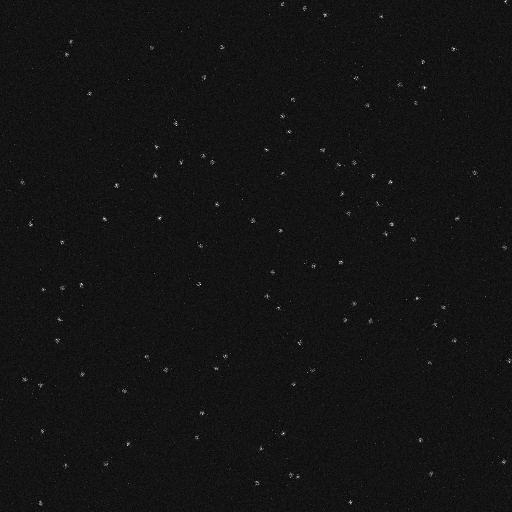

In [10]:
from IPython.display import Image
Image("tirf_000.png")